In [57]:
# import the modules
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

### Load the dataset

- Load the train data and using all your knowledge try to explore the different statistical properties of the dataset.

In [58]:
# Code starts here
data = pd.read_csv("train.csv")
data.head()

,Id,Serial Number,total_net_assets,net_annual_expenses_ratio,morningstar_rating,portfolio_cash,portfolio_stocks,portfolio_bonds,portfolio_others,portfolio_preferred,...,category_102,category_103,category_104,category_105,category_106,category_107,investment_0,investment_1,investment_2,bonds_aaa
0,3768,8372,211000,1.90,3,0.95,99.05,0.00,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.00
1,6244,5022,98930000,1.57,2,0.00,0.00,100.00,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.65
2,2230,3668,440000000,0.53,4,1.71,0.00,98.29,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,93.20
3,7518,8745,56050000,0.93,3,2.64,31.29,57.06,0.80,7.62,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.64
4,8037,17449,173040000,2.26,2,5.24,94.75,0.00,0.01,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.00


In [59]:
print(data.shape)
print(data.describe())

(9518, 154)
                 Id  Serial Number  total_net_assets  \
count   9518.000000    9518.000000      9.518000e+03   
mean    5972.644988    8854.235869      2.473000e+09   
std     3435.630920    5144.138813      1.050165e+10   
min        0.000000       2.000000      5.000000e+03   
25%     3003.500000    4366.250000      6.994750e+07   
50%     5979.000000    8879.000000      3.255700e+08   
75%     8950.750000   13279.250000      1.410000e+09   
max    11896.000000   17773.000000      1.880000e+11   

       net_annual_expenses_ratio  morningstar_rating  portfolio_cash  \
count                9518.000000         9518.000000     9518.000000   
mean                    1.018988            2.752994        6.853698   
std                     0.607111            1.363690       11.577991   
min                     0.000000            0.000000        0.000000   
25%                     0.610000            2.000000        1.122500   
50%                     0.960000            3.00000

In [60]:
data.drop(["Id","Serial Number"],1,inplace=True)

In [61]:
data.shape

(9518, 152)

In [62]:
# Code starts here
correlation = abs(data.corr())
#print(correlation)
us_correlation = correlation.unstack()
#us_correlation = pd.DataFrame(us_correlation)
us_correlation = us_correlation.sort_values(ascending = False)
us_correlation
max_correlated = us_correlation[(us_correlation>0.75) & (us_correlation<1)]

max_correlated

# Code ends here

morningstar_rating         morningstar_return_rating    0.964080
morningstar_return_rating  morningstar_rating           0.964080
portfolio_stocks           portfolio_bonds              0.917010
portfolio_bonds            portfolio_stocks             0.917010
category_12                portfolio_convertable        0.899705
portfolio_convertable      category_12                  0.899705
sharpe_ratio_3y            mean_annual_return_3y        0.766910
mean_annual_return_3y      sharpe_ratio_3y              0.766910
dtype: float64

In [63]:
data.drop('morningstar_rating',1, inplace=True)
data.drop('portfolio_stocks',1, inplace=True)
data.drop('category_12',1, inplace=True)
data.drop('sharpe_ratio_3y',1, inplace=True)

In [64]:
data.shape

(9518, 148)

In [65]:
#Importing header files
from scipy.stats import chi2_contingency
import scipy.stats as stats

#Critical value 
critical_value = stats.chi2.ppf(q = 0.95, # Find the critical value for 95% confidence*
                      df = 11)   # Df = number of variable categories(in purpose) - 1

# Code starts here
prob = 0.95
return_rating = data["morningstar_return_rating"].value_counts()
risk_rating = data["morningstar_risk_rating"].value_counts()
observed = pd.concat([return_rating.transpose() ,risk_rating.transpose()] , axis=1 , keys= ['return','risk'])
print(observed)

chi2 , p, dof, ex = chi2_contingency(observed)
if abs(chi2) >= critical_value:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')
# interpret p-value
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

   return  risk
3    3138  3057
4    2091  2098
2    1907  1763
0     994   995
5     790   890
1     598   715
Dependent (reject H0)
significance=0.050, p=0.000
Dependent (reject H0)


### Visualize the data

- Check for the categorical & continuous features. 
- Check out the best plots for plotting between categorical target and continuous features and try making some inferences from these plots.
- Check for the correlation between the features and do some Hypothesis Testing to see if there is strong association between features.
- Clean the data, remove correlated features and apply some data preprocessing techniques

Text(0.5, 1.0, 'net_annual_expenses_ratio')

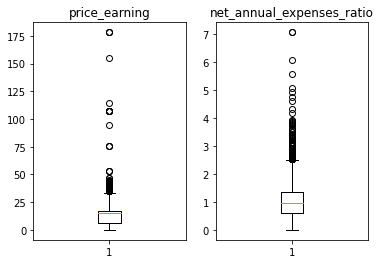

In [66]:
# Code starts here


f, (ax_1, ax_2) = plt.subplots(1, 2)
ax_1.boxplot(data['price_earning'])
ax_1.set_title('price_earning')
ax_2.boxplot(data["net_annual_expenses_ratio"])
ax_2.set_title('net_annual_expenses_ratio')








# Code ends here.

### Model building

- Separate the features and target.
- Now let's come to the actual task, using linear regression, predict the `bonds_aaa`. Use different techniques you have learned to imporove the performance of the model.
- Try improving upon the square root of `mean_squared_error` ([Root Mean Squared Error](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html)) using different parameters that give the best score.


In [67]:
# Code Starts here
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
from math import sqrt
# Code starts here
X = data.drop('bonds_aaa',1)
y = data['bonds_aaa'].copy()
X_train,X_test,y_train,y_test =train_test_split(X,y, test_size = 0.3 , random_state = 3)

lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
rmse = sqrt(mean_squared_error(y_test,y_pred))
print("The RMSE of model is:",round(rmse))


# Code ends here

The RMSE of model is: 16


### Prediction on the test data and creating the sample submission file.

- Load the test data and store the `Id` column in a separate variable.
- Perform the same operations on the test data that you have performed on the train data.
- Create the submission file as a `csv` file consisting of the `Id` column from the test data and your prediction as the second column.

In [70]:
# Code Starts here
test=pd.read_csv("test.csv")
Id=test["Id"]
test.drop(["Id","Serial Number","morningstar_rating"],1, inplace=True)
test.drop('portfolio_stocks',1, inplace=True)
test.drop('category_12',1, inplace=True)
test.drop('sharpe_ratio_3y',1, inplace=True)
y_pred = lr.predict(test)
y_pred

sample_submission = pd.DataFrame({'Id':Id,'bonds_aaa':y_pred})

# Convert the sample submission file into a csv file
sample_submission.to_csv('1st_submission.csv',index=False)
# Code ends here